In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import time

In [2]:
arff_file = arff.loadarff('seismic-bumps.arff')
df = pd.DataFrame(arff_file[0])
df['seismic'] = df['seismic'].apply(lambda x: x.decode('utf-8'))
df['seismoacoustic'] = df['seismoacoustic'].apply(lambda x: x.decode('utf-8'))
df['shift'] = df['shift'].apply(lambda x: x.decode('utf-8'))
df['ghazard'] = df['ghazard'].apply(lambda x: x.decode('utf-8'))
df = df.replace({'W': 0, 'N': 1, 'a': 0, 'b': 1, 'c': 2, 'd': 4})
df['class'] = df['class'].replace(b'0', 0)
df['class'] = df['class'].replace(b'1', 1)

k = [1, 2, 3, 4, 5]
cv = 5

C:\Users\sameg\AppData\Local\Temp\ipykernel_12456\413862387.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'W': 0, 'N': 1, 'a': 0, 'b': 1, 'c': 2, 'd': 4})
C:\Users\sameg\AppData\Local\Temp\ipykernel_12456\413862387.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(b'1', 1)


<Axes: >

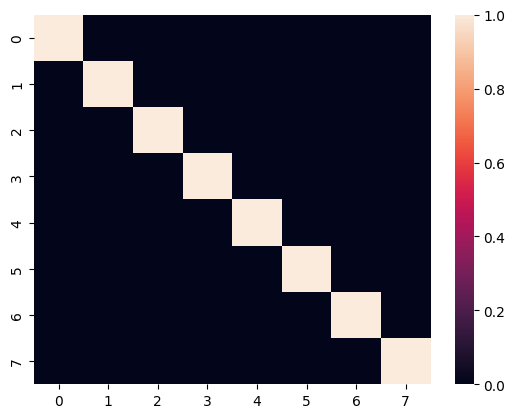

In [3]:
df_copy = df.copy()
df_copy = df_copy.iloc[:,2:18]
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df_copy)) #scaling the data
data_pca = PCA(n_components = 8).fit(scaled_data).transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()
sns.heatmap(data_pca.corr())

In [4]:
# for i in df.head():
#     s = i + 'Distribution'
#     plt.hist(df[i], color='blue', edgecolor='black')
#     plt.title(s)
#     plt.xlabel(i)
#     plt.ylabel('Frequency')
#     s = s + '.png'
#     plt.savefig(s)
#     plt.show()

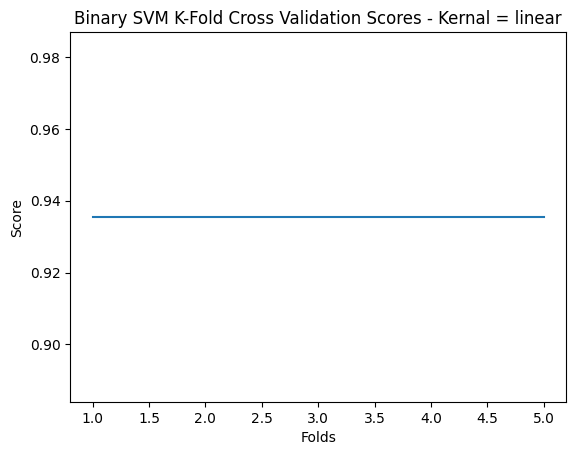

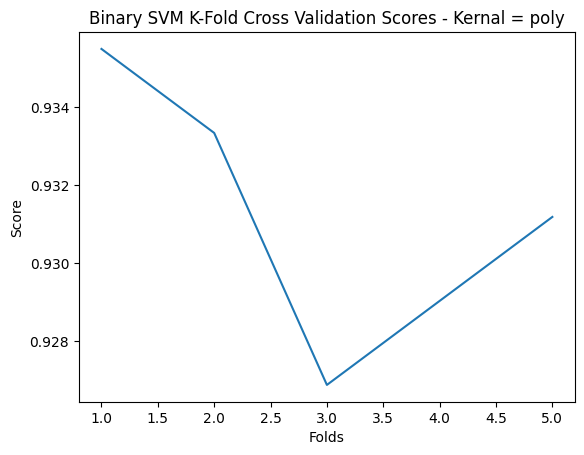

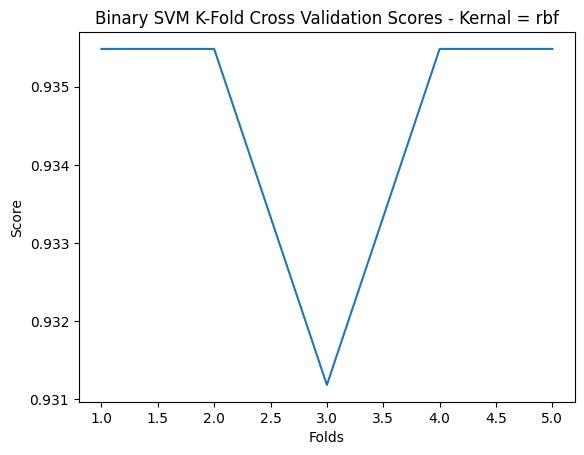

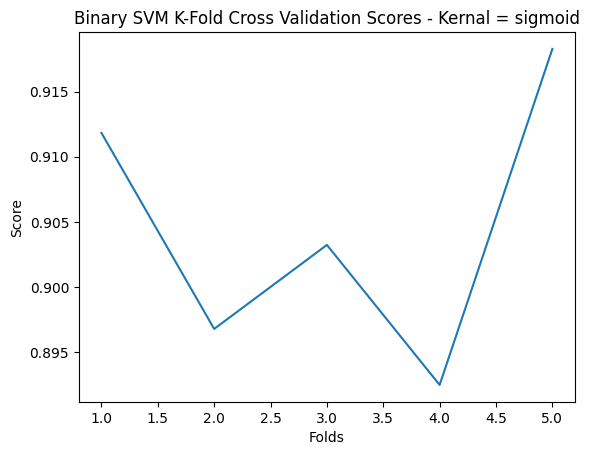

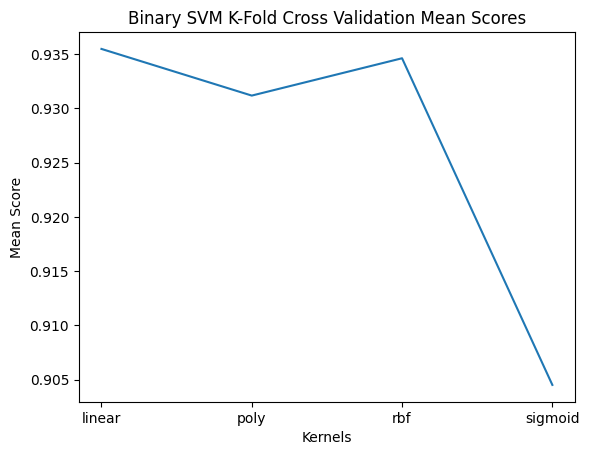

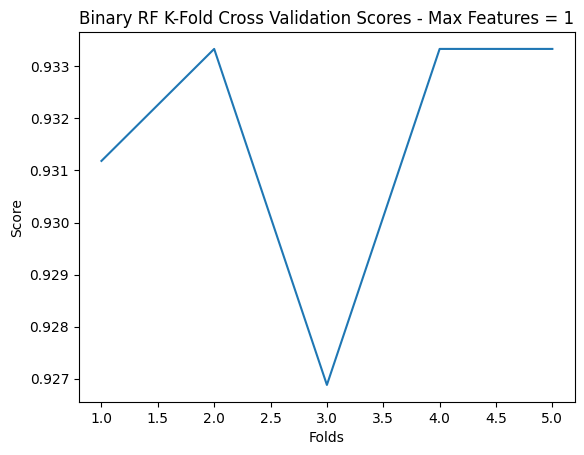

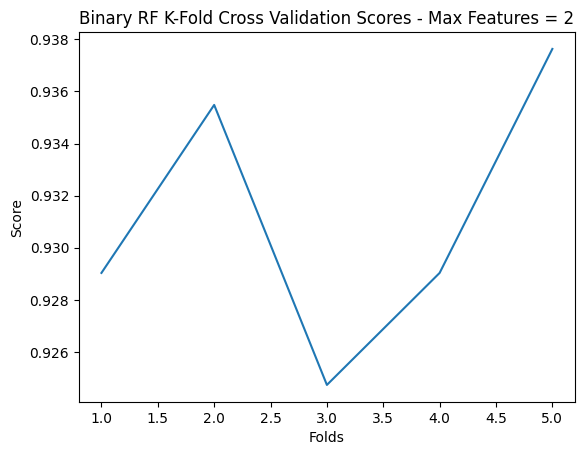

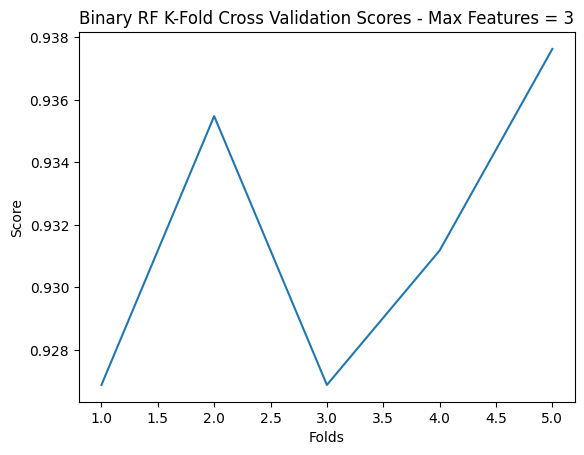

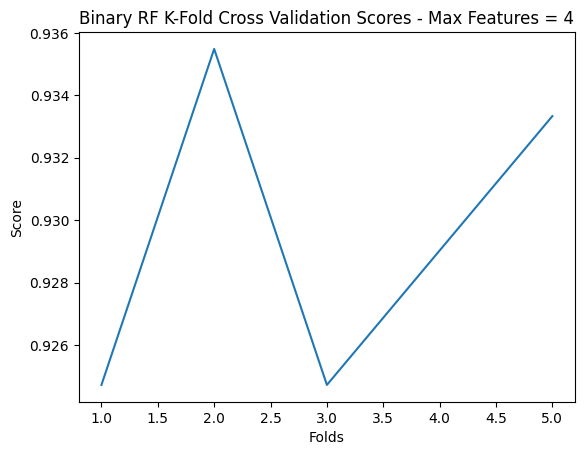

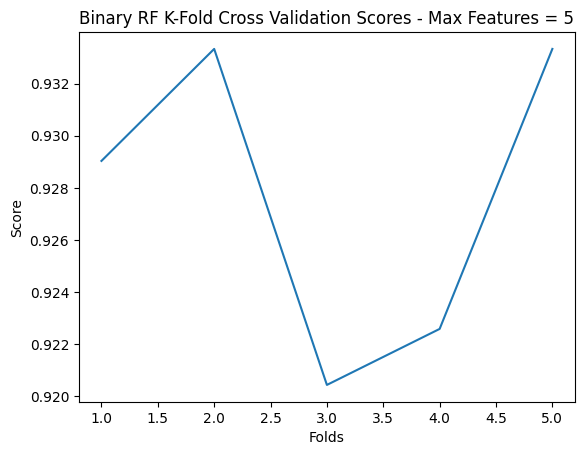

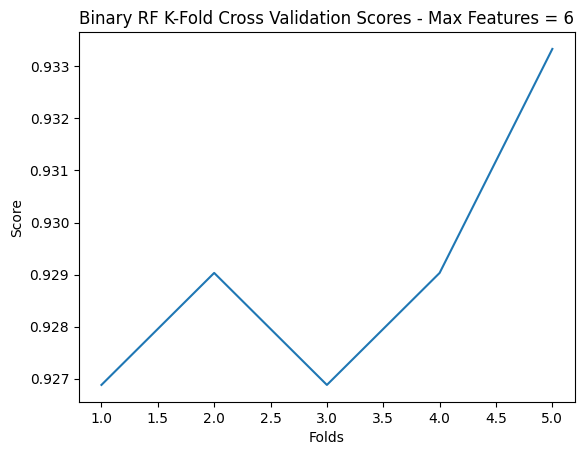

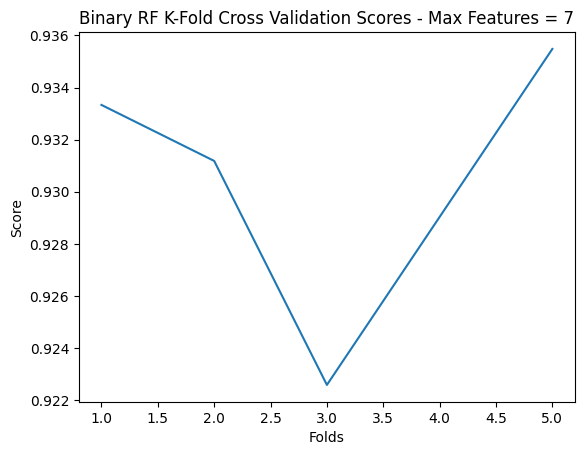

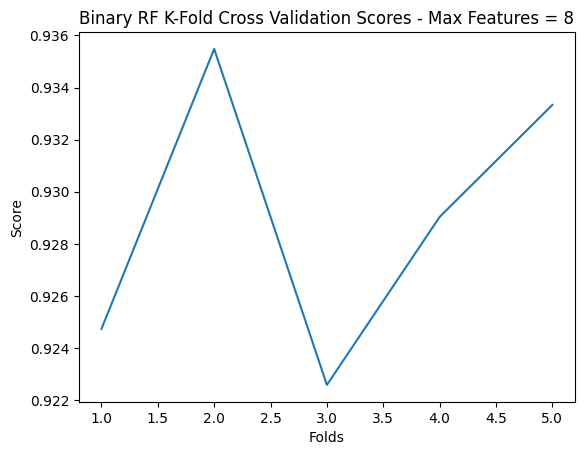

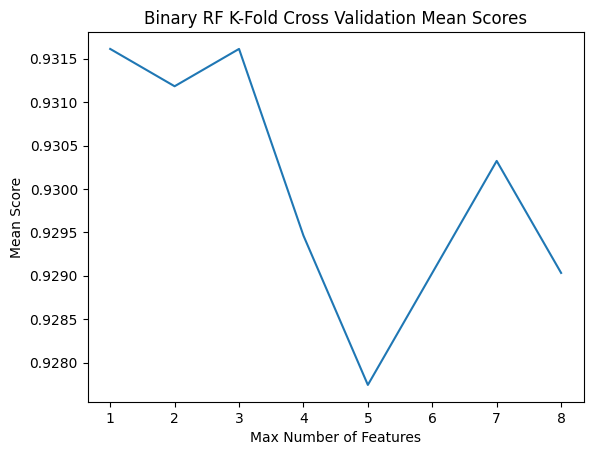

In [5]:
X = data_pca.co()
y = df['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

# X_train.to_csv('binary_X_train.csv', index=True)
# y_train.to_csv('binary_y_train.csv', index=True)
# X_val.to_csv('binary_X_val.csv', index=True)
# y_val.to_csv('binary_y_val.csv', index=True)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
binary_svm_scores = []
binary_svm_mean_scores = []
for i in kernels:
    svm_classifier = SVC(kernel=i).fit(X_train_scaled, y_train)
    scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv = cv)
    binary_svm_scores.append(scores)
    binary_svm_mean_scores.append(scores.mean())
    title = 'Binary SVM K-Fold Cross Validation Scores - Kernal = ' + i
    plt.plot(k, scores)
    plt.title(title)
    plt.xlabel('Folds')
    plt.ylabel('Score')
    plt.savefig(title + '.png')
    plt.show()
title = 'Binary SVM K-Fold Cross Validation Mean Scores'
plt.plot(kernels, binary_svm_mean_scores)
plt.title(title)
plt.xlabel('Kernels')
plt.ylabel('Mean Score')
plt.savefig(title + '.png')
plt.show()


binary_rf_scores = []
binary_rf_mean_scores = []

max_features = [1, 2, 3, 4, 5, 6, 7, 8]
for i in max_features:
    clf = RandomForestClassifier(max_features=i).fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv = cv)
    binary_rf_scores.append(scores)
    binary_rf_mean_scores.append(scores.mean())
    title = 'Binary RF K-Fold Cross Validation Scores - Max Features = ' + str(i)
    plt.plot(k, scores)
    plt.title(title)
    plt.xlabel('Folds')
    plt.ylabel('Score')
    plt.savefig(title + '.png')
    plt.show()
title = 'Binary RF K-Fold Cross Validation Mean Scores'
plt.plot(max_features, binary_rf_mean_scores)
plt.title(title)
plt.xlabel('Max Number of Features')
plt.ylabel('Mean Score')
plt.savefig(title + '.png')
plt.show()

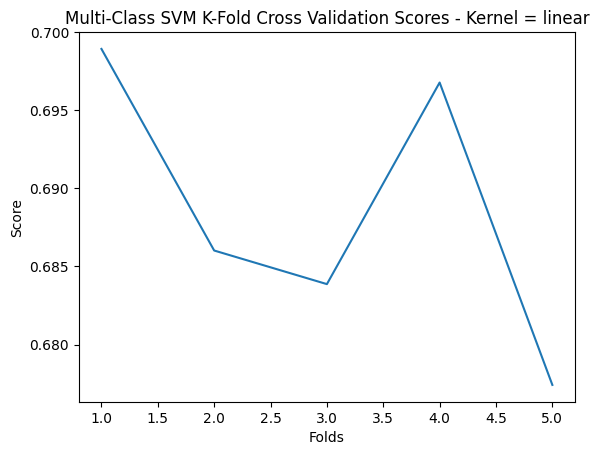

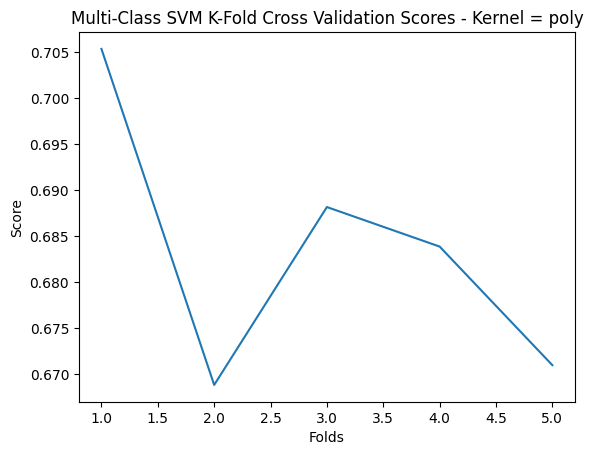

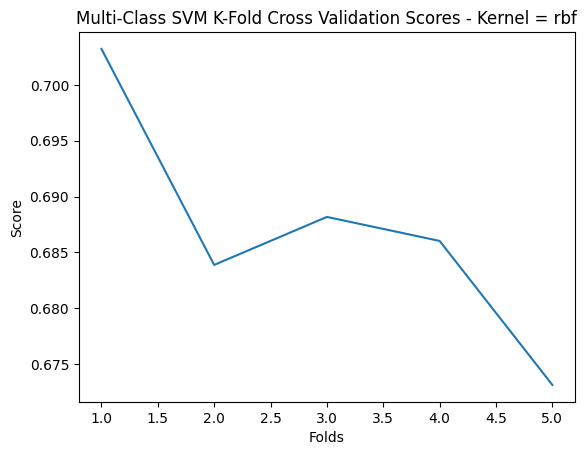

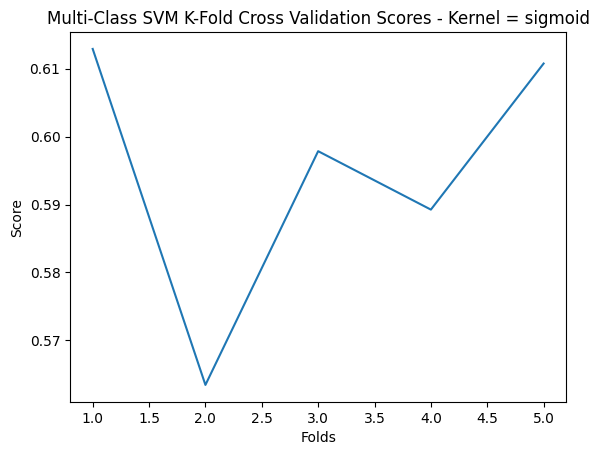

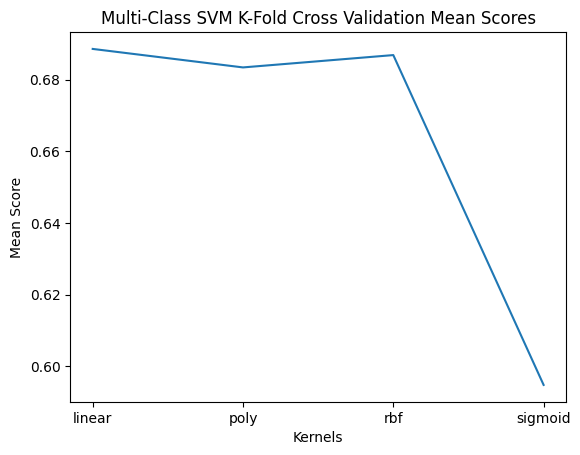

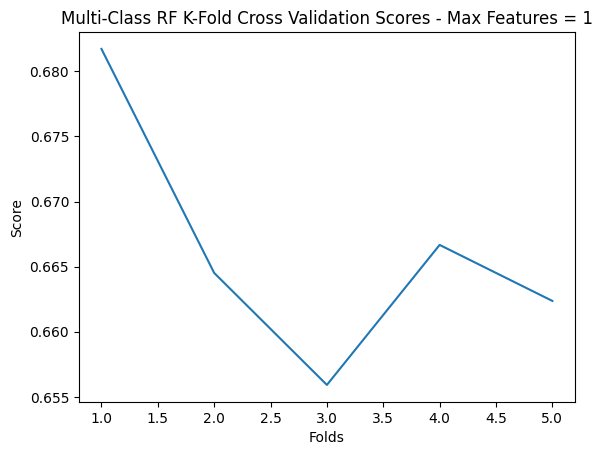

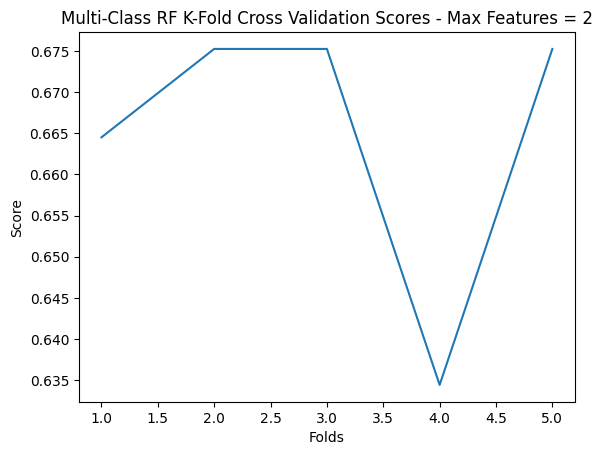

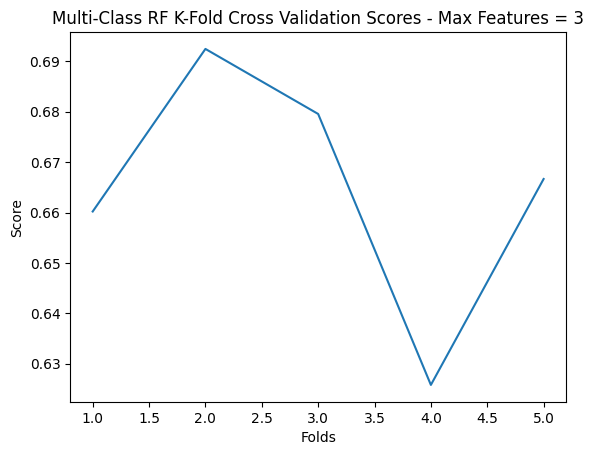

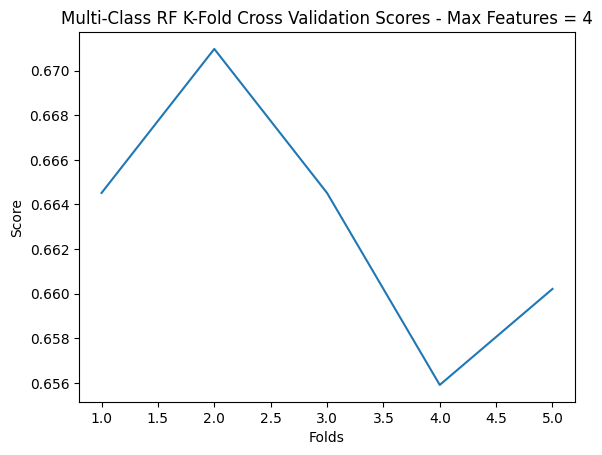

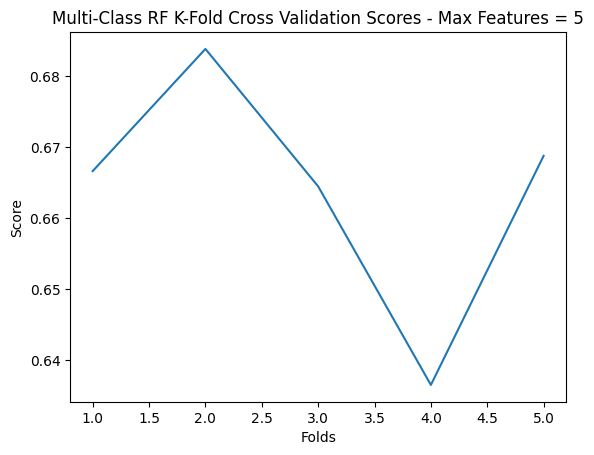

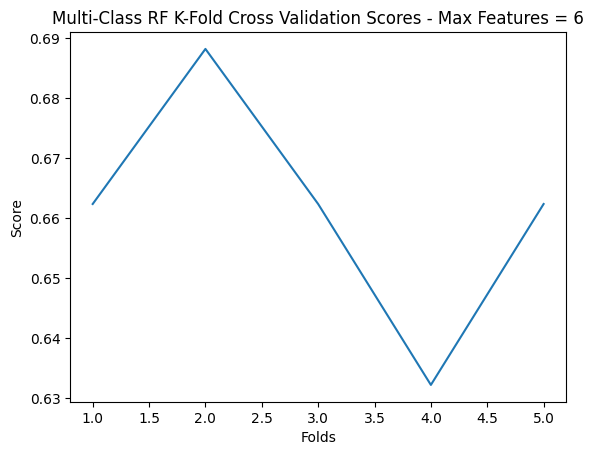

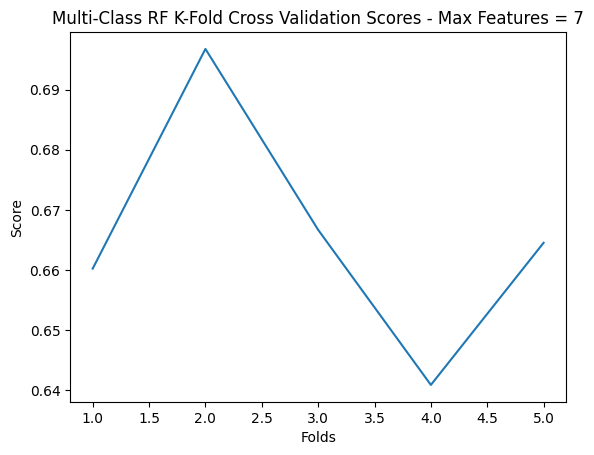

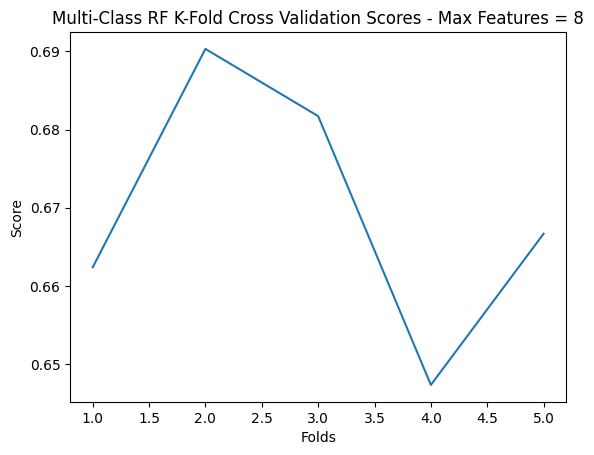

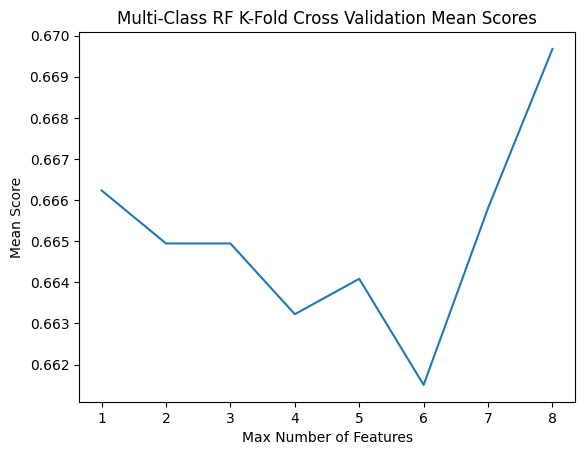

In [12]:
X = data_pca.copy()
y = df['seismoacoustic']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

X_train.to_csv('multiclass_X_train.csv', index=True)
y_train.to_csv('multiclass_y_train.csv', index=True)
X_val.to_csv('multiclass_X_val.csv', index=True)
y_val.to_csv('multiclass_y_val.csv', index=True)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
multi_svm_scores = []
multi_svm_mean_scores = []

for i in kernels:
    svm_classifier = SVC(kernel=i).fit(X_train_scaled, y_train)
    scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv = cv)
    multi_svm_scores.append(scores)
    multi_svm_mean_scores.append(scores.mean())
    title = 'Multi-Class SVM K-Fold Cross Validation Scores - Kernel = ' + i
    plt.plot(k, scores)
    plt.title(title)
    plt.xlabel('Folds')
    plt.ylabel('Score')
    plt.savefig(title + '.png')
    plt.show()
title = 'Multi-Class SVM K-Fold Cross Validation Mean Scores'
plt.plot(kernels, multi_svm_mean_scores)
plt.title(title)
plt.xlabel('Kernels')
plt.ylabel('Mean Score')
plt.savefig(title + '.png')
plt.show()

multi_rf_scores = []
multi_rf_mean_scores = []
max_features = [1, 2, 3, 4, 5, 6, 7, 8]
for i in max_features:
    clf = RandomForestClassifier(max_features=i).fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv = cv)
    multi_rf_scores.append(scores)
    multi_rf_mean_scores.append(scores.mean())
    title = 'Multi-Class RF K-Fold Cross Validation Scores - Max Features = ' + str(i)
    plt.plot(k, scores)
    plt.title(title)
    plt.xlabel('Folds')
    plt.ylabel('Score')
    plt.savefig(title + '.png')
    plt.show()
title = 'Multi-Class RF K-Fold Cross Validation Mean Scores'
plt.plot(max_features, multi_rf_mean_scores)
plt.title(title)
plt.xlabel('Max Number of Features')
plt.ylabel('Mean Score')
plt.savefig(title + '.png')
plt.show()

In [13]:
X = data_pca.copy()
y = df['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [8]:
start_time = time.perf_counter()
svm_classifier = SVC(kernel='linear').fit(X_train_scaled, y_train)
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"SVM Training runtime: {runtime:.4f} seconds")

SVM Training runtime: 0.0227 seconds


In [9]:
start_time = time.perf_counter()
print(svm_classifier.score(X_val_scaled, y_val))
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"SVM Prediction runtime: {runtime:.4f} seconds")

0.9227799227799228
SVM Prediction runtime: 0.0036 seconds


In [14]:
start_time = time.perf_counter()
clf = RandomForestClassifier(max_features=3).fit(X_train, y_train)
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"RF Training runtime: {runtime:.4f} seconds")

RF Training runtime: 0.6988 seconds


In [15]:
start_time = time.perf_counter()
print(clf.score(X_val, y_val))
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"RF Prediction runtime: {runtime:.4f} seconds")

0.9305019305019305
RF Prediction runtime: 0.0109 seconds


In [16]:
X = data_pca.copy()
y = df['seismoacoustic']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [17]:
start_time = time.perf_counter()
svm_classifier = SVC(kernel='linear').fit(X_train_scaled, y_train)
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"SVM Training runtime: {runtime:.4f} seconds")

SVM Training runtime: 1.4992 seconds


In [18]:
start_time = time.perf_counter()
print(svm_classifier.score(X_val_scaled, y_val))
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"SVM Prediction runtime: {runtime:.4f} seconds")

0.6911196911196911
SVM Prediction runtime: 0.0090 seconds


In [19]:
start_time = time.perf_counter()
clf = RandomForestClassifier(max_features=8).fit(X_train, y_train)
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"RF Training runtime: {runtime:.4f} seconds")

RF Training runtime: 2.3811 seconds


In [20]:
start_time = time.perf_counter()
print(clf.score(X_val, y_val))
end_time = time.perf_counter()
runtime = end_time - start_time
print(f"RF Prediction runtime: {runtime:.4f} seconds")

0.6177606177606177
RF Prediction runtime: 0.0133 seconds
